In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 보스턴 주택 데이터셋 URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# 데이터 읽기
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터를 2줄씩 병합하여 13개 컬럼으로 변환
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

# # DataFrame으로 변환
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
bostonDF = pd.DataFrame(data, columns=columns)

# # PRICE 컬럼 추가
bostonDF['PRICE'] = target

print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.columns

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jeongbs1\AppData\Local\Temp\ipykernel_17432\2338252309.py:14: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Boston 데이타셋 크기 : (506, 14)


In [67]:
y_target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [31]:
print(X_data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

0 CRIM 0 0
1 ZN 0 1
2 INDUS 0 2
3 CHAS 0 3
4 NOX 0 4
5 RM 0 5
6 AGE 0 6
7 DIS 1 0
8 RAD 1 1
9 TAX 1 2
10 PTRATIO 1 3
11 B 1 4
12 LSTAT 1 5


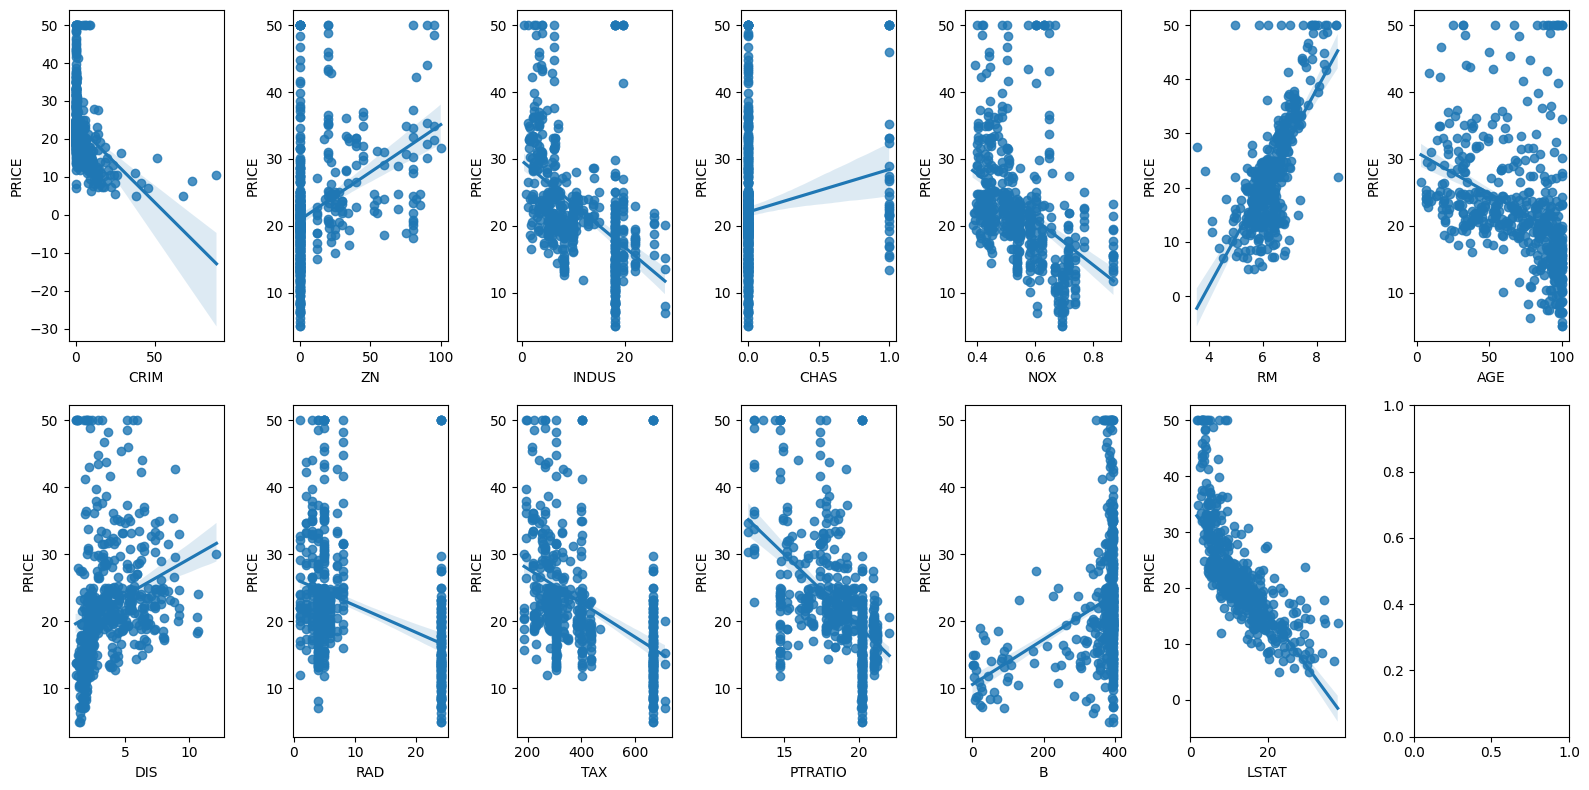

In [35]:
import matplotlib.pyplot as plt

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=7 , nrows=2)
# lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
lm_features = X_data.columns
for i , feature in enumerate(lm_features):
    # print(i, feature)
    row = int(i/7)
    col = i%7
    print(i, feature, row, col)
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
plt.tight_layout()

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

X_features = X_data
y_label = y_target

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )



In [41]:
from sklearn.metrics import accuracy_score
rfl = RandomForestRegressor(n_estimators=1000)
rfl.fit(X_train , y_train)
pred = rfl.predict(X_test)
# accuracy = accuracy_score(y_test , pred)
# print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_features, y_label, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


<Axes: xlabel='None', ylabel='None'>

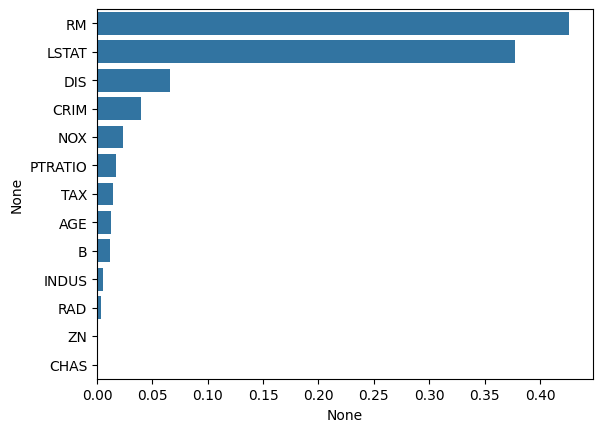

In [4]:
import seaborn as sns
# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf.fit(X_data, y_target)

feature_series = pd.Series(data=rf.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [63]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 
rfl_search_space = {'max_depth': hp.quniform('max_depth', 5, 50, 1),
                    'min_samples_leaf' : hp.quniform('min_samples_leaf', 1, 20, 1),
                    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1)
               }
rfl_search_space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1a77e8bab10>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1a7027d6a50>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1a7027d5460>}

In [64]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
from sklearn.metrics import r2_score

# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임. 
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함. 
# 정확도는 높은 수록 더 좋은 수치임. -1* 정확도를 곱해서 큰 정확도 값일 수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    rfl = RandomForestRegressor(n_estimators=1000, 
                                max_depth=int(round(search_space['max_depth'])),
                                min_samples_split=int(round(search_space['min_samples_split'])),
                                min_samples_leaf=int(round(search_space['min_samples_leaf'])),
                                n_jobs=-1)

    neg_mse_scores = cross_val_score(rfl, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    # r2 = cross_val_score(rfl, X_data, y_target, scoring="r2", cv = 5)
    
        
    # accuracy는 cv=3 개수만큼의 정확도 결과를 가지므로 이를 평균해서 반환하되 -1을 곱해줌. 
    return {'loss': neg_mse_scores, 'status': STATUS_OK}

In [65]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=rfl_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [05:54<00:00,  7.09s/trial, best loss: 4.4275275554954145]
best: {'max_depth': 13.0, 'min_samples_leaf': 1.0, 'min_samples_split': 2.0}


In [75]:
from sklearn.metrics import mean_squared_error , r2_score

def get_reg_eval(y_test, pred=None):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    print(rmse, r2)

In [76]:
rf_bo = RandomForestRegressor(n_estimators=1000, 
                                max_depth=int(round(best['max_depth'])),
                                min_samples_split=int(round(best['min_samples_split'])),
                                min_samples_leaf=int(round(best['min_samples_leaf'])),
                                n_jobs=-1)
pred = rf_bo.fit(X_train, y_train).predict(X_test)

In [77]:
get_reg_eval(y_test, pred)

2.7099564423434317 0.9131425541314998


In [78]:
ftr_importances_values = rf_bo.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)

LSTAT      0.400921
RM         0.391901
DIS        0.071069
CRIM       0.039164
NOX        0.022305
AGE        0.017186
PTRATIO    0.017121
TAX        0.015827
B          0.011981
INDUS      0.007041
RAD        0.003285
ZN         0.001144
CHAS       0.001057
dtype: float64

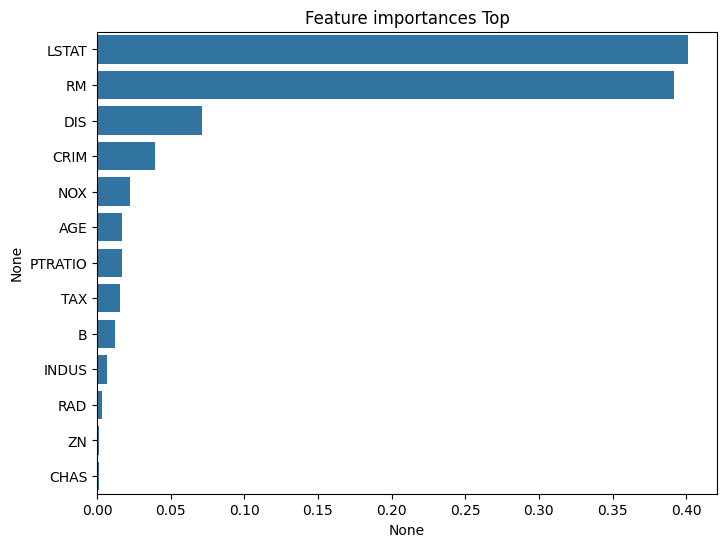

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_bo.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()